# Particle physics data-analysis with CMS open data

This week we will use real data from CMS experiment at CERN for a simple particle physics data analysis. The goal of the exercise is to discover the appearance of a particle by making a histogram from the _invariant mass_ values of muon pairs detected in the CMS detector. In the following weeks, we will determine the lifetime of a particle by fitting a Breit-Wigner distribution function to the histogram and study the effect of pseudorapidity on the mass distribution.

The structure of this week's exercise is the following:
- Theory background
- Calculation of invariant masses
- Making and analyzing the histogram

Now take a relaxed position and read the theory background first. Understanding the theory is essential for reaching the goal and learning from the exercise. So take your time and enjoy the fascination of particle physics!

## Theory background

Particle physics is the field of physics where structures of matter and radiation and interactions between them are studied. In experimental particle physics research is made by accelerating particles and colliding them to other particles or solid targets. This is done with _particle accelerators_. The collisions are examined with _particle detectors_.

World's biggest particle accelerator, Large Hadron Collider (LHC), is located at CERN, the European Organization for Nuclear Research. LHC is 27 kilometers long circle-shaped synchrotron accelerator and it is located in a tunnel 100 meters underground on the border of France and Switzerland (see Figure 1).

<figure>
    <img src="../images/LHC.png" alt="image missing" style="height: 350px" />
    <figcaption>Figure 1: The Large Hadron Collider and the four detectors around it. &copy; <a href="https://cds.cern.ch/record/1708847">CERN</a> [1]</figcaption>
</figure>

In 2012, ATLAS and CMS experiments at CERN announced that they had observed a new particle which mass was equal to the predicted mass of the Higgs boson. Higgs boson and the Higgs field related to it explain the origin of the mass of particles. In 2013 Peter Higgs and François Englert, who predicted the Higgs boson theoretically, were awarded the Nobel prize in physics.

### Accelerating particles

The LHC mainly accelerates protons. The proton source of the LHC is a bottle of hydrogen where protons are produced by stripping the electrons away from the hydrogen atoms with help of an electric field.

Before the protons arrive in the LHC they will be accelerated with electric fields and directed with magnetic fields in Linac 2, Proton Synchrotron Booster, Proton Synchrotron and Super Proton Synchrotron accelerators. 

After pre-accelerating the protons, they are directed to LHC. At this stage, protons have gained energy of 450 GeV. Protons will be directed into constantly spread bunches in two different proton beams. Each beam contains 2808 proton bunches located about 7,5 meters away from each other. Each of these bunches holds $1\text{,}2\cdot 10^{11}$ protons. The beams will circulate in opposite directions in two different vacuum tubes. Figure 2 shows part of the LHC accelerator opened with the two vacuum tubes inside. Each proton beam will reach the energy of about 7 TeV (7000 GeV) in LHC.

<figure>
    <img src="../images/LHC2.jpg" alt="image missing" style="height: 350px" />
    <figcaption> Figure 2: Part of the LHC accelerator opened. &copy; <a href="https://cds.cern.ch/record/905940">CERN</a> [2]</figcaption>
</figure>

Particle collisions are created by crossing the two beams that are heading in opposite directions. When two proton bunches cross not all of the protons collide with each other. Only about 40 protons per bunch will collide and create about 20 collisions. Because the bunches are traveling so fast, there will be about 40 million bunch crosses per one second in the LHC which means that there will be 800 million proton collisions every second in the LHC. That's a lot of action!

The maximum energy in collisions is 14 TeV. However, in most cases, the collision energy is smaller than that because when protons collide it is the quarks and gluons which collide with each other. So all of the energy of the protons won't be transmitted to the collision.

When the protons collide the collision energy can be transformed into mass ($E=mc^2$). New particles may be produced in the collisions. By examining and measuring the particles created in collisions, researchers are trying to understand better, for example, dark matter, antimatter and the constitution of all matter.

Figure 3 shows a visualization of a collision event in the CMS detector.

<figure>
    <img src="../images/eventdisplay.png" alt="image missing" style="height: 450px" />
    <figcaption> Figure 3: Collision event in CMS detector.</figcaption>
</figure>

### Video

The acceleration and collision processes are summarised well in the short video below. Watch the video from the start until 1:15 to get an idea of these processes. You can start the video by running the code cell below (click the cell and then press CTRL + ENTER).

In [11]:
from IPython.display import HTML

HTML('<iframe width="840" height="473" src="https://www.youtube.com/embed/pQhbhpU9Wrg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Examining particle collisions

Particle collisions are examined with _particle detectors_. In LHC particle beams are crossed in four different sections. These sections are the locations of four particle detectors: ATLAS, LHCb, ALICE and CMS (see Figure 1). This exercise focuses on the CMS detector and the data it collects.

CMS, the Compact Muon Solenoid, is a general-purpose detector. Goals of the CMS are for example studying the standard model of particle physics, searching for extra dimensions and searching for particles that could make up dark matter.

In other words, the goal of the CMS detector is to detect particles that are created in collisions and measure different quantities from them. CMS consists of different detectors that can detect and measure different particles. The structure of the CMS detector is shown in Figure 4.

<figure>
    <img src="../images/CMS.jpg" alt="image missing" style="height: 360px" />
    <figcaption> Figure 4: CMS detector opened. &copy; <a href="https://cds.cern.ch/record/1433717">CERN</a> [3]</figcaption>
</figure>

The detectors in CMS form an onion-like structure which ensures that as many particles as possible from the collision are detected.

Different particles act differently in the CMS detectors. Figure 5 shows the cross-section of CMS. Proton beams would travel in and out of the plane. Figure 5 also demonstrates how different particles, that were created in a collision, would proceed in CMS.

<figure>
    <img src="../images/CMS2.gif" alt="image missing" style="height: 350px" />
    <figcaption> Figure 5: The cross-section of the CMS detector. &copy; <a href="https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172">CERN</a> [4]</figcaption>
</figure>

The innermost part is the silicon tracker that makes it possible to reconstruct trajectories of charged particles. Charged particles interact electromagnetically with the tracker and make the tracker create an electric pulse. An intense magnetic field bends the trajectories of the charged particles. With the curvature of the trajectories shown by the pulses created in the tracker, it is possible to calculate the momenta of the charged particles.

Particle energies can be measured with the help of the calorimeters. Electrons and photons will stop at the Electromagnetic Calorimeter (ECAL). Hadrons such as example protons and neutrons will pass through the ECAL but will be stopped in the Hadron Calorimeter (HCAL).

ECAL is made from lead tungstate crystals that will produce light when electrons and photons pass through them. The amount of light produced is proportional to the energy of the particle. Therefore, it is possible to determine the energy of the particle stopped in ECAL with photodetectors. Also, the operation of the HCAL is based on detecting light.

Only muons and weakly interacting particles like neutrinos will pass both the ECAL and HCAL. Energies and momenta of muons can be determined with the muon chambers. The detection of the momentum is based on electrical pulses that muons create in different sections of the muon chambers. Energies of muons can't be measured directly, but the energies will be determined by calculating them from other measured quantities.

Neutrinos can't be detected directly with the CMS, but their existence can be derived with the help of missing energy. The total energy of the particles detected in a collision may be smaller than the energy before the collision. This conflicts with the energy conservation law. This indicates that something has been left undetected in the collision and, therefore, there is a possibility that neutrons were created in the collision.

### Recording the data

As mentioned above, there happens about billion particle collision in the CMS every second. The detector can detect all of these but it would be impossible to record all data from these collisions. Instead right after a collision different trigger systems will decide whether the collision has been potentially interesting or not. Non-interesting collisions won't be recorded. This multi-staged triggering process reduces the number of recorded collisions from billion to about thousand collisions per second.

Data collected from collisions will be saved to AOD (Analysis Object Data) files that can be opened with the ROOT program (https://root.cern.ch/). Structures of the files are very complicated so those can't be handled for example in simple data tables.

In this exercise, a CSV file format is used instead. A CSV file is just a regular text file that contains different values separated with commas (see Figure 6). These files can be easily read and handled with Python.

<figure>
    <img src="../images/datafile.png" alt="image missing" style="height: 80px" />
    <figcaption> Figure 6: An example of the structure of the CSV file.</figcaption>
</figure>

### Indirect detection of particles

Not every particle can be detected directly as explained above with the CMS or other particle detectors. Interesting processes are often short-lived. These processes can be searched throughout long-lived processes so detecting is then indirect.

For example, Z boson (the particle that mediates weak interaction) can't be detected directly with the CMS since the lifetime of Z is very short. This means that the Z boson will decay before it even reaches the silicon detector.

How it is possible to detect the Z boson then? A solution to this question comes from the decay process of the Z boson. If particles that originate from the decay of the Z are possible to detect, it is also possible to deduce the existence of Z.

Z boson can decay in 24 different ways. In this exercise, only one of these is considered: the decay of Z to muon $\mu^-$ and antimuon $\mu^+$. The Feynman diagram of this decay process is shown in Figure 7.

<figure>
    <img src="../images/Zdecay.png" alt="image missing" style="height: 170px" />
    <figcaption> Figure 7: Z boson decaying into muon and antimuon.</figcaption>
</figure>

Muons that are created in the decay process can be detected with the CMS. But just the detection of the muon and the antimuon isn't sufficient evidence of the existence of the Z. The detected two muons could originate from any of the processes that will happen in the collision event (many different processes are going on at the same time). Because of this, the mass of Z also needs to be reconstructed.

### The invariant mass

The mass of the Z boson (or some other particle) can be determined with the help of a concept called _invariant mass_. Let's next derive loosely an expression for the invariant mass.

Consider a situation where a particle with mass $M$ and energy $E$ decays into two particles with masses $m_1$ and $m_2$, and energies $E_1$ and $E_2$. Energy $E$ and momentum $\mathbf{p}$ is conserved in the decay process so $E = E_1 +E_2$ and $\mathbf{p} = \mathbf{p}_1+ \mathbf{p}_2$.

Particles will obey the relativistic dispersion relation:

$$
Mc^2 = \sqrt{E^2 - c^2\mathbf{p}^2}.
$$

Together with the conservation of energy and momentum, this can be shown as

$$
Mc^2 = \sqrt{(E_1+E_2)^2 - c^2(\mathbf{p_1} + \mathbf{p_2})^2}
$$
$$
=\sqrt{E_1^2+2E_1E_2+E_2^2 -c^2\mathbf{p_1}^2-2c^2\mathbf{p_1}\cdot\mathbf{p_2}-c^2\mathbf{p_2}^2}
$$
$$
=\sqrt{2E_1E_2 - 2c^2 |\mathbf{p_1}||\mathbf{p_2}|\cos(\theta)+m_1^2c^4+m_2^2c^4}. \qquad (1)
$$

The relativistic dispersion relation can be brought to the following format:

$$
M^2c^4 = E^2 - c^2\mathbf{p}^2
$$
$$
E = \sqrt{c^2\mathbf{p}^2 + M^2c^4},
$$

from where by setting $c = 1$ (very common in particle physics) and by assuming that the masses of the particles are very small compared to their momenta, we end up with the following expression:

$$
E = \sqrt{\mathbf{p}^2 + M^2} = |\mathbf{p}|\sqrt{1+\frac{M^2}{\mathbf{p}^2}}
\stackrel{M<<|\mathbf{p}|}{\longrightarrow}|\mathbf{p}|.
$$

By applying $E = |\mathbf{p}|$ to equation (1), it can be reduced to the format

$$
M=\sqrt{2E_1E_2(1-\cos(\theta))},
$$

where $\theta$ is the angle between the momentum vector of the particles. With this equation, it is possible to calculate the invariant mass for the particle pair if energies of the particles and the angle $\theta$ are known.

In experimental particle physics, the equation for the invariant mass is often in the form

$$
M = \sqrt{2p_{T1}p_{T2}( \cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2) )}, \qquad (2)
$$

where transverse momentum $p_T$ is the component of the momentum of the particle that is perpendicular to the particle beam, $\eta$ is the pseudorapidity and $\phi$ is the azimuth angle. Pseudorapidity and the angle $\theta$ are related by $\eta = -\ln(\tan(\frac{\theta}{2}))$.

Figure 8 expresses the angles $\theta$, $\eta$ and $\phi$ in the CMS detector. The particle beams will travel to the z-direction. Figure 8 also shows that because of the determination of $\eta$ it goes to 0 when $\theta = 90^{\circ}$ and to $\infty$ when $\theta = 0^{\circ}$.

<figure>
    <img src="../images/CMSangles.png" alt="image missing" style="height: 300px" />
    <figcaption> Figure 8: Angles $\theta$, $\eta$ and $\phi$ in the CMS detector.</figcaption>
</figure>

### Reconstructing particle mass

With invariant mass, it is possible to prove the existence of a particle. In this exercise, you will use data that contains such collisions where two muons have been detected (among with many other particles). It is possible to calculate an invariant mass value for a muon pair in one collision event using equation (2).

If the invariant mass of the muon pair is equal to the mass of, for example, Z boson, it can be verified that the muon pair originates from the decay of the Z. If the invariant mass of the muon pair gets some other value the muons are originated from some other processes. __Therefore, invariant mass can be used as evidence of the existence of the Z boson__.

### Identifying the particle

In practice, the identification of a particle goes in the following way. The invariant mass for two muons is calculated for a large number of collision events. Then, a histogram is made from the calculated invariant mass values. This histogram shows how many muon pairs in the dataset had a specific invariant mass determined by the number of bins in the histogram.

If a peak (many invariant mass values near the same bin) is formed in the histogram, it can prove that in the collision events there has been a particle which mass corresponds to the peak. After that, it is possible to fit a function to the histogram and determine the mass and the lifetime of the particle from the parameters of the fitted function (this will be done in exercise 3).

# Invariant mass

In this part of the exercise, your task is to read collision data from a csv-file, calculate the invariant mass of the two muons for each collision event in the dataset, plot a histogram from the invariant mass values and identify the particle that was decayed into two muons.

## Part 1 - data

Each student has a different data file. Check the name of your data file from Moodle exercise.

The data file contains events, where two muons were observed. The data file is stored in the same folder as this notebook file so that you can easily read it using _pandas_ -library.

### Task

Read the data from file and save it to a pandas dataframe called 'ds'. Then print the first few rows to see how the data looks.

<br>
<details>
    <summary>$\text{Click here for a hint}$</summary>
    Use read_csv()-function from pandas library and head()-method of a dataframe-object.
</details>

$\color{red}{\text{Write the code below and test the function with CodeRunner-exercise 1 on Moodle}}$

In [13]:
# solution for dataset1.csv

import pandas as pd

filename = 'dataset1.csv'
ds = pd.read_csv(filename)
ds.head()

# Hint1: Use read_csv()-function from pandas library and head()-method of a dataframe-object.

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75206813,G,10.16230,0.476262,-8.51642,5.52306,8.52973,0.609133,-1.51493,-1,G,19.77540,2.750800,-13.98710,13.70590,14.25500,0.853872,-1.376610,1
1,165617,74428554,G,21.82790,-6.221380,11.08450,17.74470,12.71110,1.135660,2.08225,-1,G,36.65130,-10.687400,15.06920,31.65440,18.47430,1.307610,2.187680,1
2,165617,74981507,G,30.58620,15.521800,5.12931,-25.85090,16.34740,-1.239060,0.31916,1,G,12.48680,7.764020,1.04247,-9.72328,7.83369,-1.042090,0.133471,-1
3,165617,75612982,G,7.55441,1.291290,-5.35884,-5.16462,5.51223,-0.836073,-1.33434,-1,T,3.84161,-0.989578,-3.45483,-1.35340,3.59376,-0.368220,-1.849760,1
4,165617,74760204,G,24.63760,9.983590,19.14260,-11.86970,21.58960,-0.525296,1.09007,1,G,11.02130,3.378510,7.82724,-6.98411,8.52525,-0.747611,1.163320,-1


In [3]:
# solution for Zmumu.csv

import pandas as pd

ds = pd.read_csv('Zmumu.csv')
ds.head()

# Hint1: Use read_csv()-function from pandas library and head()-method of a dataframe-object.

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


In [6]:
# test whether the 'ds' -dataframe contains the events in 'Zmumu.csv'
# NOTE! the file Zmumu.csv needs to be added to Coderunner for the test to work.

import pandas as pd

testds = pd.read_csv('Zmumu.csv')
print(ds.equals(testds))

# Excpected output:
# True

True


## Part 2 - calculation

As you probably saw from part 1, the dataset contains a number of different columns. The meaning of each column is:

- Run = The run number of the event.
- Event = The event number.
- Type = Either T or G, where T stands for tracker muon and G stands for global muon.
- E = The total energy of the muon (GeV).
- px, py, pz = The components of the momemtum of the muon (GeV).
- pt = The transverse momentum of the muon (GeV).
- eta = $\eta$ = The pseudorapidity of the muon.
- phi = $\phi$ = The phi angle of the muon (rad).
- Q = The charge of the muon.

### Task

Write a python function <b>invariant_mass( pt1, pt2, eta1, eta2, psi1, psi2 )</b> that takes transverse momentums, pseudorapidities and azimuth angles of two particles as parameters and <b>returns the invariant mass</b>. Remember that the invariant mass can be calculated as $M=\sqrt{2p_{T1}p_{T2}(\cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2))}$. 

<br>

<details>
    <summary>$\color{black}{\text{Click here for a hint}}$</summary>
    You can use square root and trigonometric functions by importing <b>numpy</b> module.
</details>

$\color{red}{\text{Write the code below and test the function with CodeRunner-exercise 2 on Moodle}}$

In [14]:
# possible solution

import numpy as np

def invariant_mass(pt1,pt2,eta1,eta2,phi1,phi2):
    return np.sqrt( 2*pt1*pt2* ( np.cosh(eta1-eta2) - np.cos(phi1-phi2) ) )

# Hint1: You can use square root and trigonometric functions by importing numpy-module.

In [16]:
# test with artificial parameters

import numpy as np

pt1,pt2,eta1,eta2,phi1,phi2  =  0,1,2,3,4,5
print(round(invariant_mass(pt1,pt2,eta1,eta2,phi1,phi2),2))

# expected output: 
# 0.0

# test with artificial parameters
pt1,pt2,eta1,eta2,phi1,phi2  =  9,8,7,6,5,4
print(round(invariant_mass(pt1,pt2,eta1,eta2,phi1,phi2),2))

# expected output: 
# 12.02

# test with data near Z mass
pt1,pt2,eta1,eta2,phi1,phi2  =  58.6914, 45.7231, -1.02101, -0.37030, 0.836256, 2.741820
print(round(invariant_mass(pt1,pt2,eta1,eta2,phi1,phi2),2))

# expected output: 
# 91.14

# test with data near J/psi mass
pt1,pt2,eta1,eta2,phi1,phi2  =  6.60896, 17.876452, -0.250095, -0.375014, 0.512346, 0.765667
print(round(invariant_mass(pt1,pt2,eta1,eta2,phi1,phi2),2))

# expected output: 
# 3.06

# test with more data
import pandas as pd
df = pd.read_csv('DoubleMuRun2011A.csv')
df2 = df.head(10)
inv_mass = invariant_mass(df2.pt1,df2.pt2,df2.eta1,df2.eta2,df2.phi1,df2.phi2)
for mass in inv_mass:
    print(round(mass,2))

# expected output:
# 17.49
# 11.55
# 9.16
# 12.48
# 14.31
# 6.82
# 39.53
# 37.74
# 10.54
# 3.11

0.0
12.02
91.14
3.06
17.49
11.55
9.16
12.48
14.31
6.82
39.53
37.74
10.54
3.11


### Task

<br>
Use your invariant_mass -function to calculate the invariant mass of each pair of muons in the dataset. Save the masses to a variable called 'inv_mass'.
<br>
Hint: Remember you can access to a column of a dataframe by writing "dataframe_name.column_name". You should be able to pass whole columns as parameters to your function (as long as the columns are of the same length).
<br>

$\color{red}{\text{Write the code below and test the function with CodeRunner-exercise 3 on Moodle}}$

In [15]:
# solution for dataset1.csv

ds = pd.read_csv('dataset1.csv')

inv_mass = invariant_mass(ds.pt1,ds.pt2,ds.eta1,ds.eta2,ds.phi1,ds.phi2)

# Hint1: Access 'pt1'-column in ds-dataframe by writing 'ds.pt1'.
# Hint2: inv_mass = invariant_mass(...)
# Hint3: inv_mass = invariant_mass(ds.pt1,ds.pt2,...)

0    3.105162
1    3.093230
2    3.063882
3    3.092384
4    3.181425
dtype: float64

In [18]:
# solution for Zmumu.csv
# Zmumu.csv file needed for coderunner.

ds = pd.read_csv('Zmumu.csv')

inv_mass = invariant_mass(ds.pt1,ds.pt2,ds.eta1,ds.eta2,ds.phi1,ds.phi2)

# Hint1: Access 'pt1'-column in ds-dataframe by writing 'ds.pt1'.
# Hint2: inv_mass = invariant_mass(...)
# Hint3: inv_mass = invariant_mass(ds.pt1,ds.pt2,...)

In [19]:
# test cases for Zmumu.csv

import numpy as np

print(round(np.mean(inv_mass),2))
# Expected output:
# 87.97

87.97


## Part 3 - histogram

Now that you have calculated the invariant masses for the entire dataset, it's time to plot a histogram and see what kind of distribution we get.

### Task

Plot a histogram from the invariant mass values. Use different amount of bins to see how the figure changes. You can also use "range"-attribute for plt.hist to zoom to a specific range. You should be able to see a peak. What particle does the peak correspond to (compare your result to figure 9)?

<br>
<details>
    <summary>$\text{Click here for a hint}$</summary>
    Use hist()-function from matplotlib.pyplot -module.
</details>

$\color{red}{\text{Write the code below}}$

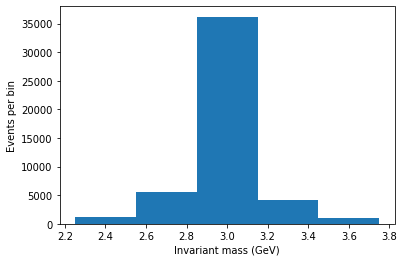

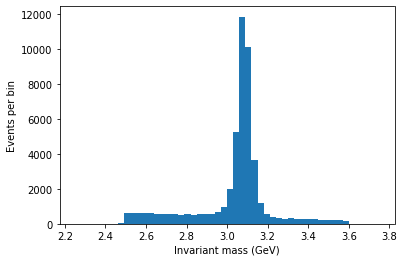

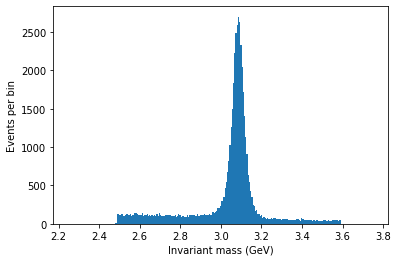

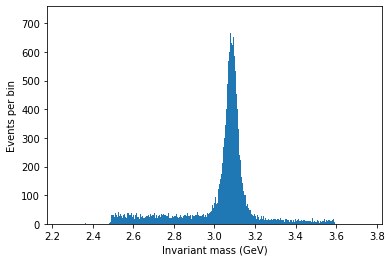

In [18]:
import matplotlib.pyplot as plt

for i in [5,50,250,1000]:
    fig = plt.figure()
    plt.hist(inv_mass,bins=i)
    plt.xlabel('Invariant mass (GeV)')
    plt.ylabel('Events per bin')
plt.show()

<figure>
    <img src="../images/CMShistogram.png" alt="image missing" style="height: 300px" />
    <figcaption> Figure 9: Histogram of collisions where two muons were observed.</figcaption>
</figure>

## Final task

Find the answer for the following questions and submit your answers to Moodle.

Note: leave only the questions here. The answer options will go to moodle question. The answer options and correct answer needs to be modified based on the dataset student has.

1 How many events are in the dataset?

    a) 10000 correct
    b) 50000
    c) 100000
    d) 1000

2 How many events where 80 GeV < inv_mass < 100 GeV are in the dataset? (You can filter your inv_mass -dataframe to figure this out.)

    a) 8259 correct
    b) 129
    c) 49821
    d) 6119

3 Which of the following invariant_mass value is closest to the peak value of the histogram?

    a) 90 GeV correct
    b) 85 Gev
    c) 80 GeV
    d) 95 Gev

4 How many events are there in the largest bin, when the number of bins is 50? (roughly)

    a) 1600 correct
    b) 2100
    c) 900
    d) 450

5 How about when number of bins is 250?

    a) 350 correct
    b) 900
    c) 550
    d) 80
    
6 Which particle did you discover from your data?

In [33]:
print("Question 1:")
print(len(inv_mass))
print()
print("Question 2:")
print(len(inv_mass[(inv_mass > 80) & (inv_mass < 100)]))
print()
print("Questions 3,4,5 from figures above.")

Question 1:
10000

Question 2:
8259

Questions 3,4,5 from figures above.


[1] P. Mouche, *Overall view of the LHC. Vue d'ensemble du LHC*, 2014.
Url: [https://cds.cern.ch/record/1708847](https://cds.cern.ch/record/1708847).

[2] M. Brice, *View of an open LHC interconnection. Vue d'une interconnection ouverte*, 2005.
Url: [https://cds.cern.ch/record/905940](https://cds.cern.ch/record/905940)

[3] CMS Collaboration, *Detector Drawings*, 2012.
Url: [https://cds.cern.ch/record/1433717](https://cds.cern.ch/record/1433717).

[4] M. Lapka, D. Barney, E. Quigg et al., *Interactive slice of CMS detector*, 2010.
Url: [https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172](https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172).